In [21]:
import pandas as pd
import numpy as np


def topsis(data, weight=None):
    """

    TOPSIS algorithm

    Args:
        data: Features
        weight:

    Returns:
        Result:
        Z:
        weight:

    """
    # normalized
    data = data / np.sqrt((data ** 2).sum())
    # best and worst solution
    Z = pd.DataFrame([data.min(), data.max()], index=['负理想解', '正理想解'])

    Result = data.copy()
    Result['正理想解'] = np.sqrt(((data - Z.loc['正理想解']) ** 2 * weight).sum(axis=1))
    Result['负理想解'] = np.sqrt(((data - Z.loc['负理想解']) ** 2 * weight).sum(axis=1))

    # composite score index
    Result['综合得分指数'] = Result['负理想解'] / (Result['负理想解'] + Result['正理想解'])
    Result['排序'] = Result.rank(ascending=False)['综合得分指数']

    return Result, Z, weight


weight = [0.00689, 0.00629, 0.35295, 0.006, 0.00931, 0.0096, 0.00529, 0.39955, 0.20412]
data = pd.read_excel(
    r"E:\Programing\PycharmProjects\2022MCM-B\Q2\处理数据\第二问制定的政策.xlsx")  #The path and the name of the file
# data = pd.read_excel(
#     r"E:\Programing\PycharmProjects\2022MCM-B\Q2\处理数据\政策(1).xlsx")  #The path and the name of the file

data = data.set_index('政策')
Result, Z, weight = topsis(data, weight)
res = Result.iloc[:, -4:-1]
Result

,人口密度（人/平方千米）,耕地面积,森林面积,大象致人伤亡数量,食草动物致人伤亡数量,食肉动物致人伤亡数量,营地累计数量和住宿（MMNR内部以及周边地区）,犀牛栖息地百分比,牛放牧扩大占比,正理想解,负理想解,综合得分指数,排序
政策,,,,,,,,,,,,,
1,0.164365,0.162074,0.152679,0.166957,0.142857,0.173585,0.159996,0.154411,0.000000,0.203827,0.026407,0.114697,23.0
2,0.164365,0.162074,0.152679,0.166957,0.142857,0.173585,0.159996,0.154411,0.100322,0.164819,0.052457,0.241429,12.0
3,0.164365,0.162074,0.152679,0.166957,0.142857,0.173585,0.159996,0.154411,0.200643,0.129975,0.094418,0.420771,9.0
4,0.164365,0.162074,0.152679,0.166957,0.142857,0.173585,0.159996,0.154411,0.300965,0.103588,0.138515,0.572134,8.0
5,0.164365,0.162074,0.152679,0.166957,0.142857,0.173585,0.159996,0.154411,0.401286,0.093145,0.183213,0.662954,1.0
6,0.164365,0.162074,0.152679,0.166957,0.142857,0.173585,0.159996,0.171568,0.000000,0.200629,0.028547,0.124565,18.0
7,0.164365,0.162074,0.152679,0.166957,0.142857,0.173585,0.159996,0.214460,0.000000,0.195056,0.046239,0.191629,14.0
8,0.164365,0.162074,0.152679,0.166957,0.142857,0.173585,0.159996,0.257352,0.000000,0.193162,0.070223,0.266617,10.0
9,0.164365,0.162074,0.152679,0.166957,0.142857,0.173585,0.104345,0.154411,0.000000,0.203938,0.026095,0.113441,26.0


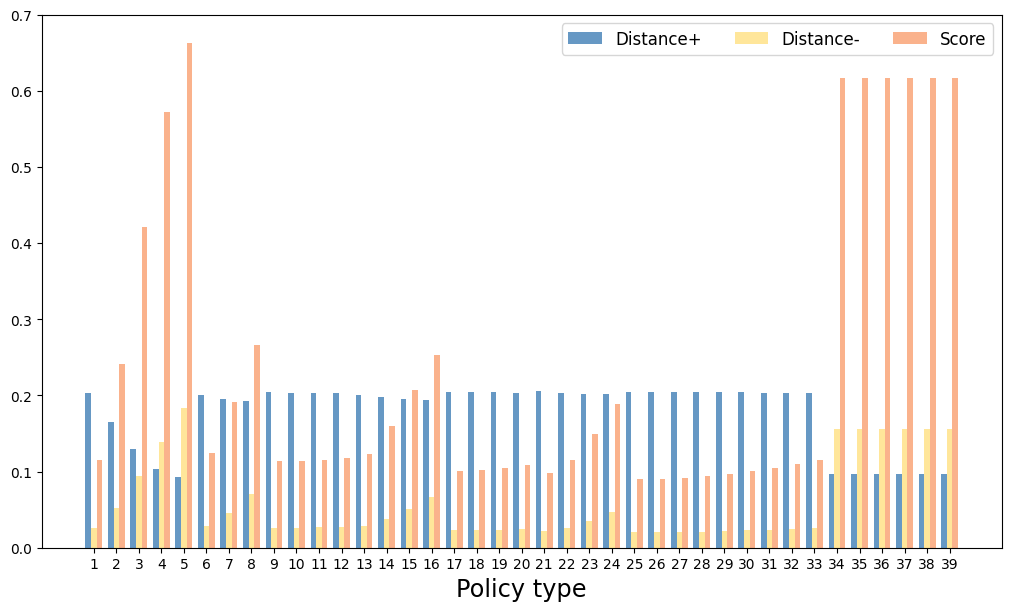

In [27]:
import matplotlib.pyplot as plt
import numpy as np

species = res.index.to_list()
penguin_means = {
    'Distance+': res['正理想解'].to_list(),
    'Distance-': res['负理想解'].to_list(),
    'Score': res['综合得分指数'].to_list(),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(constrained_layout=True, figsize=(10, 6))

# Distance+
offset = width * multiplier
rects = ax.bar(x + offset, list(penguin_means.items())[multiplier][1], width,
               label=list(penguin_means.items())[multiplier][0], color='#6698c4')
multiplier += 1

# Distance-
offset = width * multiplier
rects = ax.bar(x + offset, list(penguin_means.items())[multiplier][1], width,
               label=list(penguin_means.items())[multiplier][0], color='#ffe69a')
multiplier += 1

# Score
offset = width * multiplier
rects = ax.bar(x + offset, list(penguin_means.items())[multiplier][1], width,
               label=list(penguin_means.items())[multiplier][0], color='#fab28c')
# ax.bar_label(rects, padding=3, fmt='%.3lf')
multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x + width, species)
ax.legend(loc='upper right', ncols=3, fontsize='large')
ax.set_ylim(0, 0.7)
ax.set_xlabel('Policy type', fontsize='xx-large')

plt.savefig('topsis.svg')
plt.show()